## K-NEAREST NEIGHBORS

### DATA CLEANSING

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set()
from sklearn.metrics import f1_score
import sklearn.metrics
from pandas_profiling import ProfileReport
from IPython.core.display import display
from pandas_profiling.report.presentation.flavours.widget.notebook import (get_notebook_iframe,)
from functions import *

df= pd.read_csv('ds_salaries.csv')
df.head(10)

C:\Temp\ipykernel_7972\4226120678.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [2]:
df.work_year.unique()

array([2020, 2021, 2022], dtype=int64)

K-Nearest neirborgs method to predict remote ratio


In [3]:
k_df= pd.DataFrame(df[['work_year','experience_level', 'employment_type','salary_in_usd', 'remote_ratio',
       'company_size', 'job_title', 'employee_residence', 'salary_currency','company_location' ]])
k_df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title,employee_residence,salary_currency,company_location
0,2020,MI,FT,79833,0,L,Data Scientist,DE,EUR,DE
1,2020,SE,FT,260000,0,S,Machine Learning Scientist,JP,USD,JP
2,2020,SE,FT,109024,50,M,Big Data Engineer,GB,GBP,GB
3,2020,MI,FT,20000,0,S,Product Data Analyst,HN,USD,HN
4,2020,SE,FT,150000,50,L,Machine Learning Engineer,US,USD,US
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,100,M,Data Engineer,US,USD,US
603,2022,SE,FT,126000,100,M,Data Engineer,US,USD,US
604,2022,SE,FT,129000,0,M,Data Analyst,US,USD,US
605,2022,SE,FT,150000,100,M,Data Analyst,US,USD,US


In [4]:
k_df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [5]:
K_converted=[]
for i in k_df.salary_in_usd:
    if i <= 62726:
        K_converted.append(0)
    elif i > 62726 and i <= 101570:
        
        K_converted.append(1)
    else:
        
        K_converted.append(2)


In [6]:
k_df['salaries_converted']= K_converted

In [7]:
k_df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title,employee_residence,salary_currency,company_location,salaries_converted
0,2020,MI,FT,79833,0,L,Data Scientist,DE,EUR,DE,1
1,2020,SE,FT,260000,0,S,Machine Learning Scientist,JP,USD,JP,2
2,2020,SE,FT,109024,50,M,Big Data Engineer,GB,GBP,GB,2
3,2020,MI,FT,20000,0,S,Product Data Analyst,HN,USD,HN,0
4,2020,SE,FT,150000,50,L,Machine Learning Engineer,US,USD,US,2
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,100,M,Data Engineer,US,USD,US,2
603,2022,SE,FT,126000,100,M,Data Engineer,US,USD,US,2
604,2022,SE,FT,129000,0,M,Data Analyst,US,USD,US,2
605,2022,SE,FT,150000,100,M,Data Analyst,US,USD,US,2


In [8]:

k_df_clean= k_df.drop('salary_in_usd', axis=1)
k_df_clean

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title,employee_residence,salary_currency,company_location,salaries_converted
0,2020,MI,FT,0,L,Data Scientist,DE,EUR,DE,1
1,2020,SE,FT,0,S,Machine Learning Scientist,JP,USD,JP,2
2,2020,SE,FT,50,M,Big Data Engineer,GB,GBP,GB,2
3,2020,MI,FT,0,S,Product Data Analyst,HN,USD,HN,0
4,2020,SE,FT,50,L,Machine Learning Engineer,US,USD,US,2
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,100,M,Data Engineer,US,USD,US,2
603,2022,SE,FT,100,M,Data Engineer,US,USD,US,2
604,2022,SE,FT,0,M,Data Analyst,US,USD,US,2
605,2022,SE,FT,100,M,Data Analyst,US,USD,US,2


In [9]:
k_df_clean.experience_level.unique(), k_df_clean.employment_type.unique()

(array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 array(['FT', 'CT', 'PT', 'FL'], dtype=object))

In [10]:
experience_converted= []
for i in k_df_clean.experience_level:
    if i== 'MI':
        experience_converted.append(0)
    elif i== 'SE':
        experience_converted.append(1)
    elif 1=='EN':
        experience_converted.append(2)
    else:
        experience_converted.append(3)

k_df_clean['experience_converted']= experience_converted

employment_type_converted= []
for i in k_df_clean.employment_type:
    if i== 'FT':
        employment_type_converted.append(0)
    elif i== 'CT':
        employment_type_converted.append(1)
    elif 1=='PT':
        employment_type_converted.append(2)
    else:
        employment_type_converted.append(3)


k_df_clean['employment_type_converted']= employment_type_converted

company_size_converted= []
for i in k_df_clean.company_size:
    if i== 'M':
        company_size_converted.append(0)
    elif i== 'L':
        company_size_converted.append(1)
    else:
        company_size_converted.append(2)
k_df_clean['company_size_converted']=company_size_converted


In [11]:
k_df_clean

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title,employee_residence,salary_currency,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted
0,2020,MI,FT,0,L,Data Scientist,DE,EUR,DE,1,0,0,1
1,2020,SE,FT,0,S,Machine Learning Scientist,JP,USD,JP,2,1,0,2
2,2020,SE,FT,50,M,Big Data Engineer,GB,GBP,GB,2,1,0,0
3,2020,MI,FT,0,S,Product Data Analyst,HN,USD,HN,0,0,0,2
4,2020,SE,FT,50,L,Machine Learning Engineer,US,USD,US,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,100,M,Data Engineer,US,USD,US,2,1,0,0
603,2022,SE,FT,100,M,Data Engineer,US,USD,US,2,1,0,0
604,2022,SE,FT,0,M,Data Analyst,US,USD,US,2,1,0,0
605,2022,SE,FT,100,M,Data Analyst,US,USD,US,2,1,0,0


In [12]:
k_df_clean= k_df_clean.drop(['employment_type','company_size','experience_level'], axis=1)

In [13]:
k_df_clean

,work_year,remote_ratio,job_title,employee_residence,salary_currency,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted
0,2020,0,Data Scientist,DE,EUR,DE,1,0,0,1
1,2020,0,Machine Learning Scientist,JP,USD,JP,2,1,0,2
2,2020,50,Big Data Engineer,GB,GBP,GB,2,1,0,0
3,2020,0,Product Data Analyst,HN,USD,HN,0,0,0,2
4,2020,50,Machine Learning Engineer,US,USD,US,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
602,2022,100,Data Engineer,US,USD,US,2,1,0,0
603,2022,100,Data Engineer,US,USD,US,2,1,0,0
604,2022,0,Data Analyst,US,USD,US,2,1,0,0
605,2022,100,Data Analyst,US,USD,US,2,1,0,0


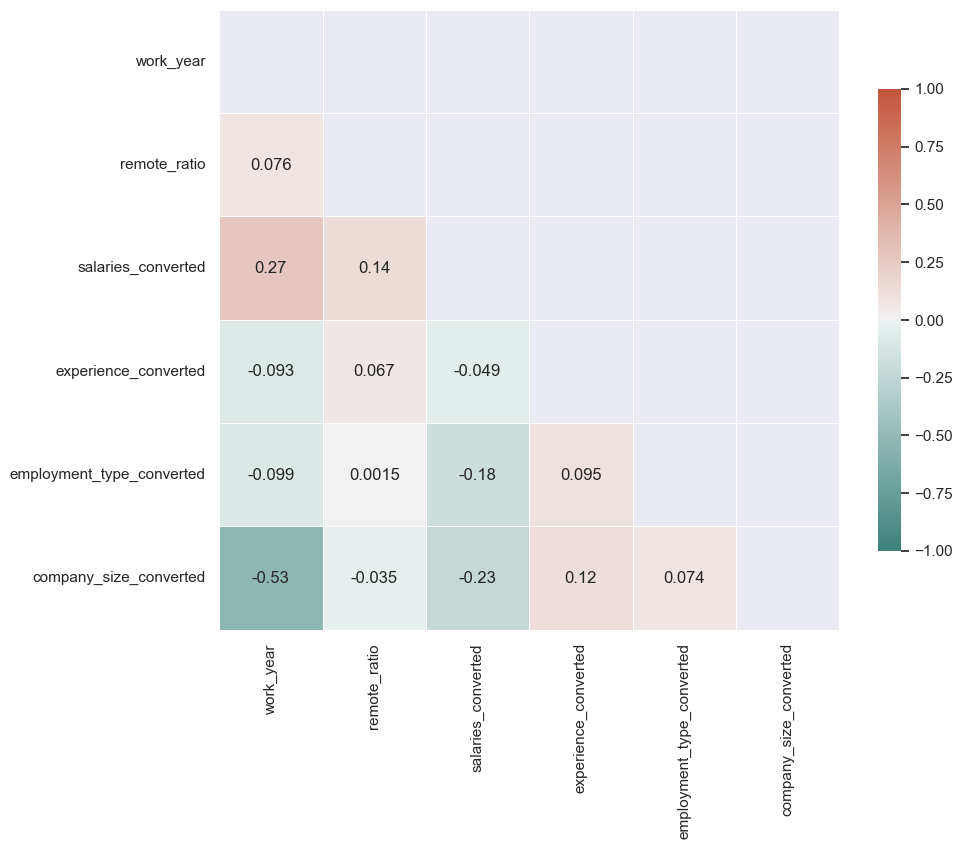

In [14]:
print_corr(k_df_clean)

In [15]:
remote_ratio_converted=[]
for i in k_df_clean.remote_ratio:
    if i== 0:
        remote_ratio_converted.append(0)
    elif i==50:
        remote_ratio_converted.append(1)
    else:
        remote_ratio_converted.append(2)
k_df_clean['remote_ratio_converted']= remote_ratio_converted
k_df_clean= k_df_clean.drop('remote_ratio', axis=1)




In [16]:
k_df_clean.job_title.value_counts()
job_title_convert=['Data Scientist','Data Engineer', 'Data Analyst', 'data other']
k_df_clean.job_title = k_df_clean.job_title.apply(lambda x: 'data other' if x not in job_title_convert else x)
k_df_clean.job_title.value_counts()

data other        235
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

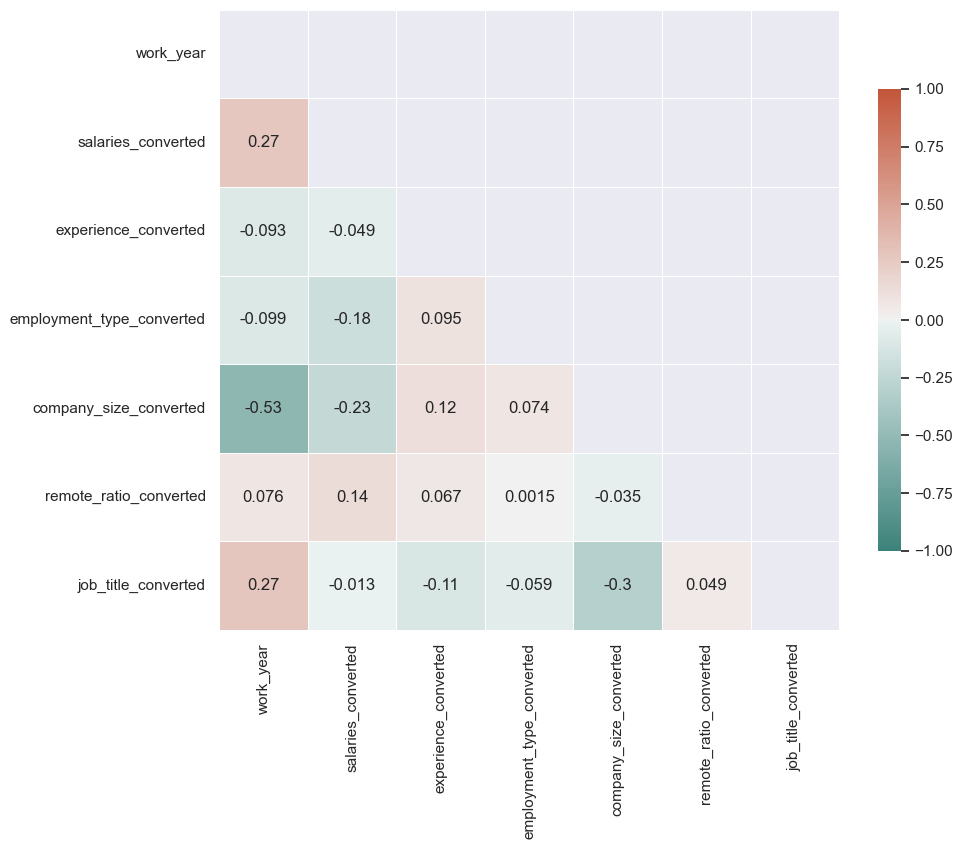

In [17]:
job_title_converted=[]
for i in k_df_clean.job_title:
    if i== 'data other':
        job_title_converted.append(0)
    elif i=='Data Scientist':
        job_title_converted.append(1)
    elif i=='Data Engineer':
        job_title_converted.append(2)
    else:
        job_title_converted.append(3)
k_df_clean['job_title_converted']= job_title_converted
k_df_clean= k_df_clean.drop('job_title', axis=1)
print_corr(k_df_clean)

In [18]:
k_df_clean.employee_residence.value_counts()


US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [19]:
employee_residence_convert=['US','GB', 'IN']
k_df_clean.employee_residence = k_df_clean.employee_residence.apply(lambda x: 'other' if x not in employee_residence_convert else x)
k_df_clean.employee_residence.value_counts()

US       332
other    201
GB        44
IN        30
Name: employee_residence, dtype: int64

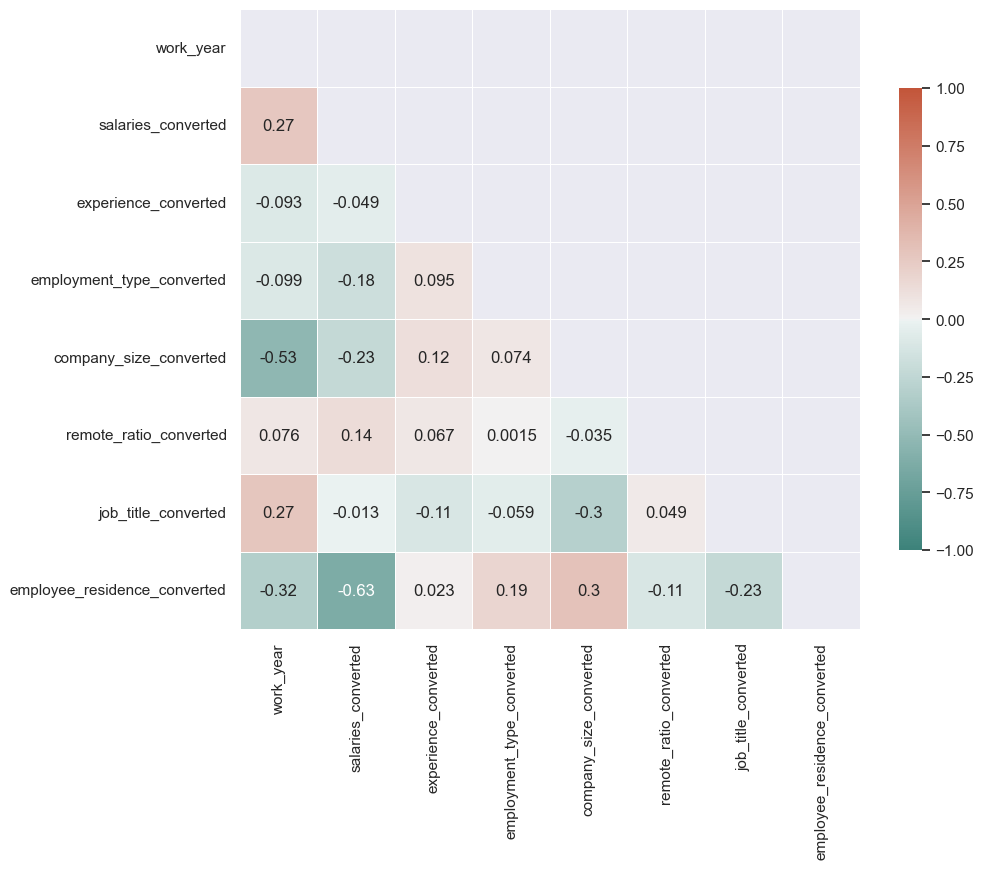

In [20]:
employee_residence_converted=[]
for i in k_df_clean.employee_residence:
    if i== 'US':
        employee_residence_converted.append(0)
    elif i=='GB':
        employee_residence_converted.append(1)
    elif i=='IN':
        employee_residence_converted.append(2)
    else:
        employee_residence_converted.append(3)
k_df_clean['employee_residence_converted']= employee_residence_converted
k_df_clean= k_df_clean.drop('employee_residence', axis=1)
print_corr(k_df_clean)

In [21]:
summary_regression_model(k_df_clean[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted', 'job_title_converted',
       'employee_residence_converted']], k_df_clean.remote_ratio_converted)

                              OLS Regression Results                              
Dep. Variable:     remote_ratio_converted   R-squared:                       0.029
Model:                                OLS   Adj. R-squared:                  0.020
Method:                     Least Squares   F-statistic:                     3.032
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):            0.00628
Time:                            19:30:55   Log-Likelihood:                -726.95
No. Observations:                     607   AIC:                             1468.
Df Residuals:                         600   BIC:                             1499.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [22]:
k_df_clean

,work_year,salary_currency,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted
0,2020,EUR,DE,1,0,0,1,0,1,3
1,2020,USD,JP,2,1,0,2,0,0,3
2,2020,GBP,GB,2,1,0,0,1,0,1
3,2020,USD,HN,0,0,0,2,0,0,3
4,2020,USD,US,2,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,USD,US,2,1,0,0,2,2,0
603,2022,USD,US,2,1,0,0,2,2,0
604,2022,USD,US,2,1,0,0,0,3,0
605,2022,USD,US,2,1,0,0,2,3,0


In [23]:
k_df_clean

,work_year,salary_currency,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted
0,2020,EUR,DE,1,0,0,1,0,1,3
1,2020,USD,JP,2,1,0,2,0,0,3
2,2020,GBP,GB,2,1,0,0,1,0,1
3,2020,USD,HN,0,0,0,2,0,0,3
4,2020,USD,US,2,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,USD,US,2,1,0,0,2,2,0
603,2022,USD,US,2,1,0,0,2,2,0
604,2022,USD,US,2,1,0,0,0,3,0
605,2022,USD,US,2,1,0,0,2,3,0


In [24]:
work_year_converted=[]
for i in k_df_clean.work_year:
    if i== '2020':
        work_year_converted.append(0)
    elif i=='2021':
        work_year_converted.append(1)
    else:
        work_year_converted.append(2)
k_df_clean['work_year_converted']= work_year_converted
k_df_clean= k_df_clean.drop('work_year', axis=1)
k_df_clean

,salary_currency,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted,work_year_converted
0,EUR,DE,1,0,0,1,0,1,3,2
1,USD,JP,2,1,0,2,0,0,3,2
2,GBP,GB,2,1,0,0,1,0,1,2
3,USD,HN,0,0,0,2,0,0,3,2
4,USD,US,2,1,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
602,USD,US,2,1,0,0,2,2,0,2
603,USD,US,2,1,0,0,2,2,0,2
604,USD,US,2,1,0,0,0,3,0,2
605,USD,US,2,1,0,0,2,3,0,2


In [25]:
k_df_clean.salary_currency.value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [26]:
salary_currency_convert=['USD','EUR', 'GBP']
k_df_clean.salary_currency = k_df_clean.salary_currency.apply(lambda x: 'OTHER CURRENCY' if x not in salary_currency_convert else x)
k_df_clean.salary_currency.value_counts()

USD               398
EUR                95
OTHER CURRENCY     70
GBP                44
Name: salary_currency, dtype: int64

In [27]:
salary_currency_converted=[]
for i in k_df_clean.salary_currency:
    if i== 'USD':
        salary_currency_converted.append(0)
    elif i=='EUR':
        salary_currency_converted.append(1)
    elif i=='OTHER CURRENCY':
        salary_currency_converted.append(2)
    else:
        salary_currency_converted.append(3)
k_df_clean['salary_currency_converted']= salary_currency_converted
k_df_clean= k_df_clean.drop('salary_currency', axis=1)
k_df_clean

,company_location,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted,work_year_converted,salary_currency_converted
0,DE,1,0,0,1,0,1,3,2,1
1,JP,2,1,0,2,0,0,3,2,0
2,GB,2,1,0,0,1,0,1,2,3
3,HN,0,0,0,2,0,0,3,2,0
4,US,2,1,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
602,US,2,1,0,0,2,2,0,2,0
603,US,2,1,0,0,2,2,0,2,0
604,US,2,1,0,0,0,3,0,2,0
605,US,2,1,0,0,2,3,0,2,0


In [28]:
k_df_clean.company_location.value_counts()
company_location_convert=['US','GB', 'CA']
k_df_clean.company_location = k_df_clean.company_location.apply(lambda x: 'OTHER' if x not in company_location_convert else x)
k_df_clean.company_location.value_counts()
company_location_converted=[]
for i in k_df_clean.company_location:
    if i== 'US':
        company_location_converted.append(0)
    elif i=='GB':
        company_location_converted.append(1)
    elif i=='CA':
        company_location_converted.append(2)
    else:
        company_location_converted.append(3)
k_df_clean['company_location_converted']= company_location_converted
k_df_clean= k_df_clean.drop('company_location', axis=1)
k_df_clean

,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted,work_year_converted,salary_currency_converted,company_location_converted
0,1,0,0,1,0,1,3,2,1,3
1,2,1,0,2,0,0,3,2,0,3
2,2,1,0,0,1,0,1,2,3,1
3,0,0,0,2,0,0,3,2,0,3
4,2,1,0,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
602,2,1,0,0,2,2,0,2,0,0
603,2,1,0,0,2,2,0,2,0,0
604,2,1,0,0,0,3,0,2,0,0
605,2,1,0,0,2,3,0,2,0,0


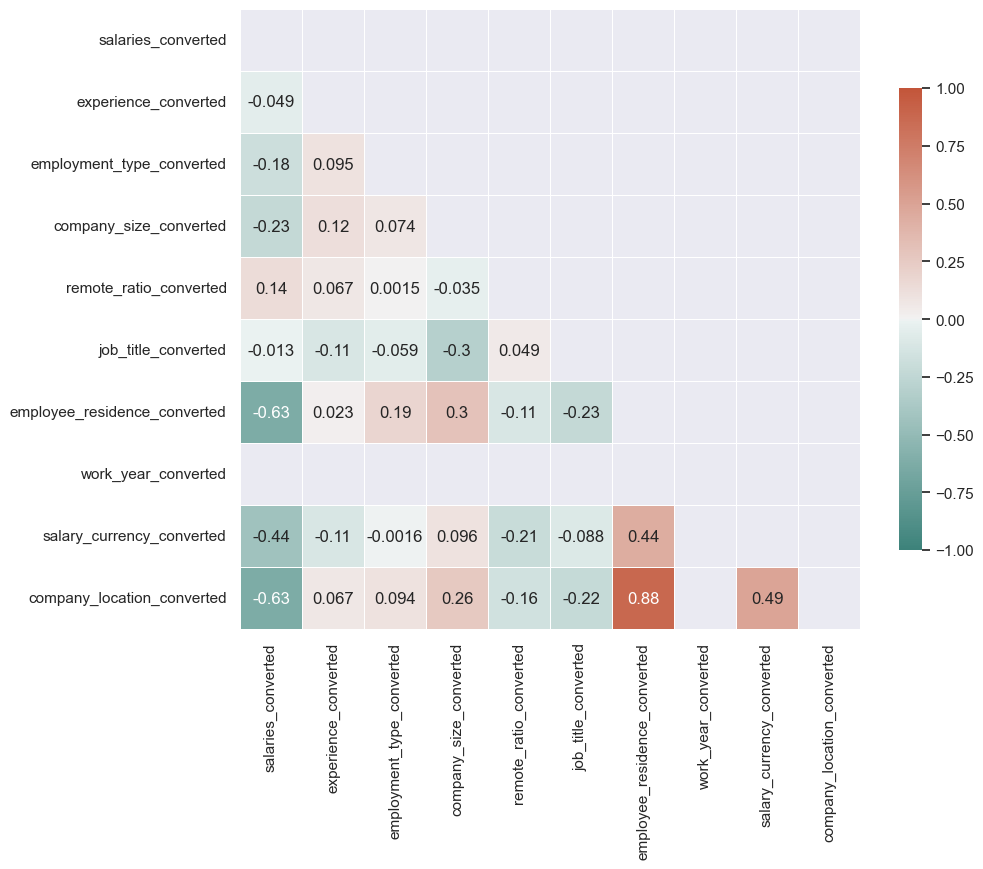

In [29]:
print_corr(k_df_clean)
k_dummies= pd.get_dummies(k_df_clean)


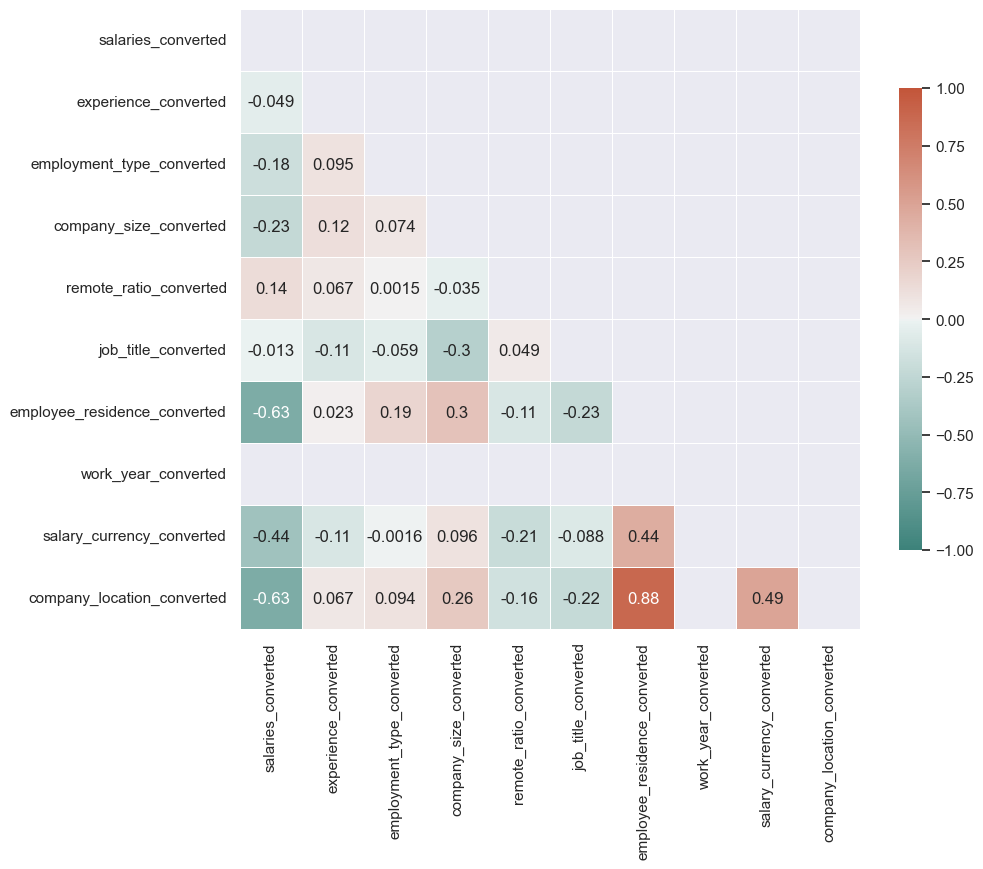

In [30]:
print_corr(k_dummies)

Having the columns and data set converted and analyzed, we do not found strong correlations between the variables.
The most correlated ones are experience, company size and job title. So those, are going to be our choice.

## MACHINE LEARNING PROCESS K-NEAREST NEIGHBORS TEST 1

In [31]:
x= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y= k_dummies.remote_ratio_converted
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
K= KNeighborsClassifier()
K.fit(X_train,y_train)


KNeighborsClassifier()

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    K = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=K.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52459016, 0.26229508, 0.42622951, 0.3852459 , 0.56557377,
       0.53278689, 0.54918033, 0.43442623, 0.54918033])

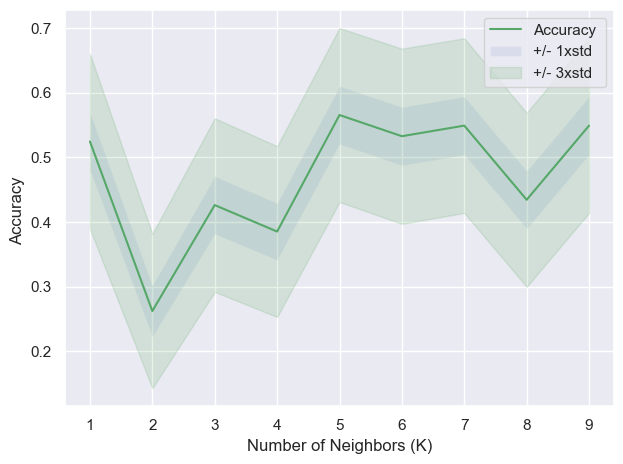

In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [35]:
k = 5
#Train Model and Predict  
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh5

KNeighborsClassifier()

In [36]:
neigh5_pre= neigh5.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh5_pre))
f1_score(y_test, neigh5_pre, average='micro')

Test set Accuracy:  0.5655737704918032


0.5655737704918032

Confusion matrix, without normalization
[[11  4  9]
 [ 4  5 14]
 [18  4 53]]


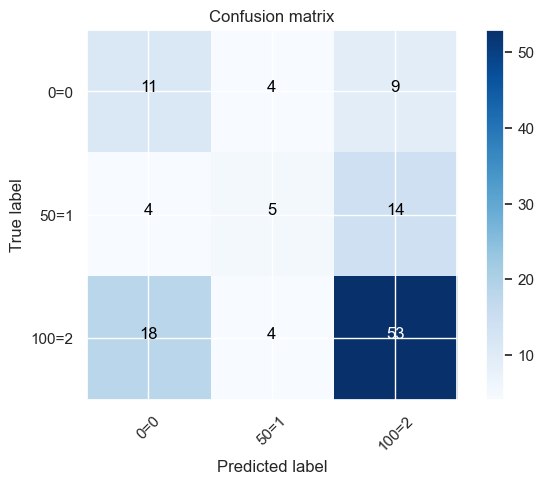

In [37]:
cnf_matrix = confusion_matrix(y_test, neigh5_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

Finally we can see the score for this method it is not really capable of classifing with the given variables, so we are going to imput the rest.

## MACHINE LEARNING PROCESS K-NEAREST NEIGHBORS TEST 2

In [38]:
k_dummies.columns

Index(['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'remote_ratio_converted', 'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted'],
      dtype='object')

In [39]:
x2= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y2= k_dummies.remote_ratio_converted
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
K6= KNeighborsClassifier()
K6.fit(X2_train,y2_train)

KNeighborsClassifier()

In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    K = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    yhat=K.predict(X2_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y2_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.6 , 0.48, 0.58, 0.52, 0.63, 0.54, 0.65, 0.64, 0.64])

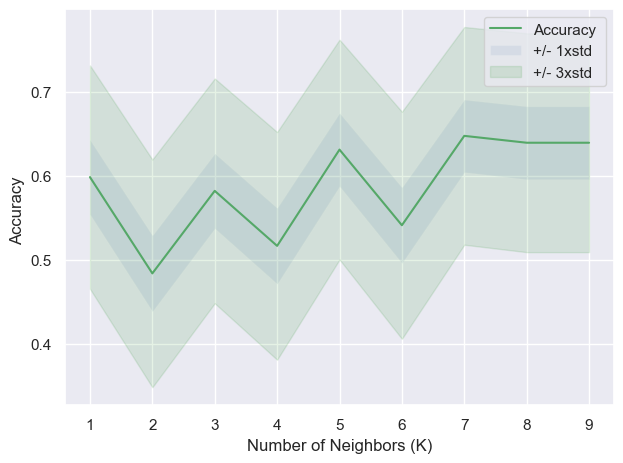

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [43]:
k = 7
#Train Model and Predict  
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
neigh7
neig7_pre= neigh7.predict(X2_test)
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, neig7_pre))

f1_score(y2_test, neig7_pre, average='micro')

Test set Accuracy:  0.6475409836065574


0.6475409836065574

Confusion matrix, without normalization
[[11  4  9]
 [ 4  5 14]
 [18  4 53]]


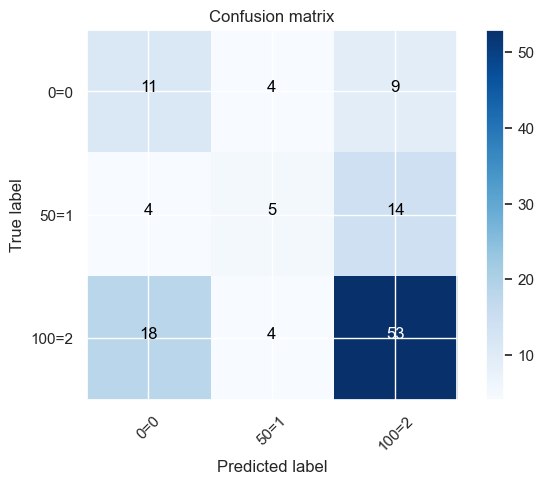

In [44]:
cnf_matrix = confusion_matrix(y2_test, neigh5_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

As we can see, even with this kind of variables the model does not predict accurately the number of remote jobs. We are going to try with classification trees and 
Support Vector Machines.

## LEARNING MACHINE CLASSIFICATION TREE TEST 1

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
x3= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y3= k_dummies.remote_ratio_converted
X3_train, X3_test, y3_train, y3_test = train_test_split( x3, y3, test_size=0.2, random_state=4)
print ('Train set:', X3_train.shape,  y3_train.shape)
print ('Test set:', X3_test.shape,  y3_test.shape)



Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


In [47]:
remote_tree= DecisionTreeClassifier(criterion= "entropy", max_depth = 3, splitter='random')
remote_tree.fit(X3_train, y3_train)
remote_tree_pre= remote_tree.predict(X3_test)
print("Test set Accuracy: ", metrics.accuracy_score(y3_test, remote_tree_pre))
f1_score(y3_test, remote_tree_pre, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


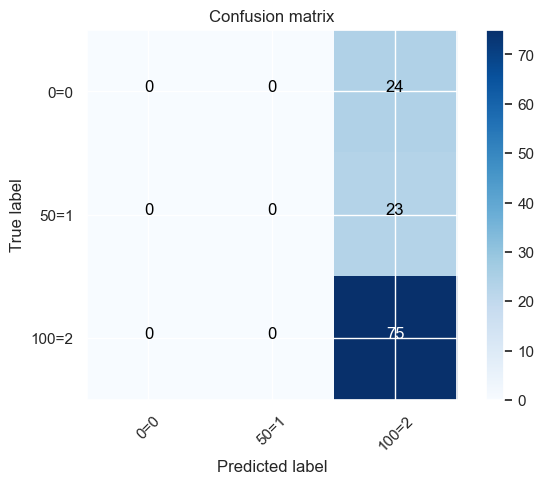

In [48]:
cnf_matrix = confusion_matrix(y3_test, remote_tree_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

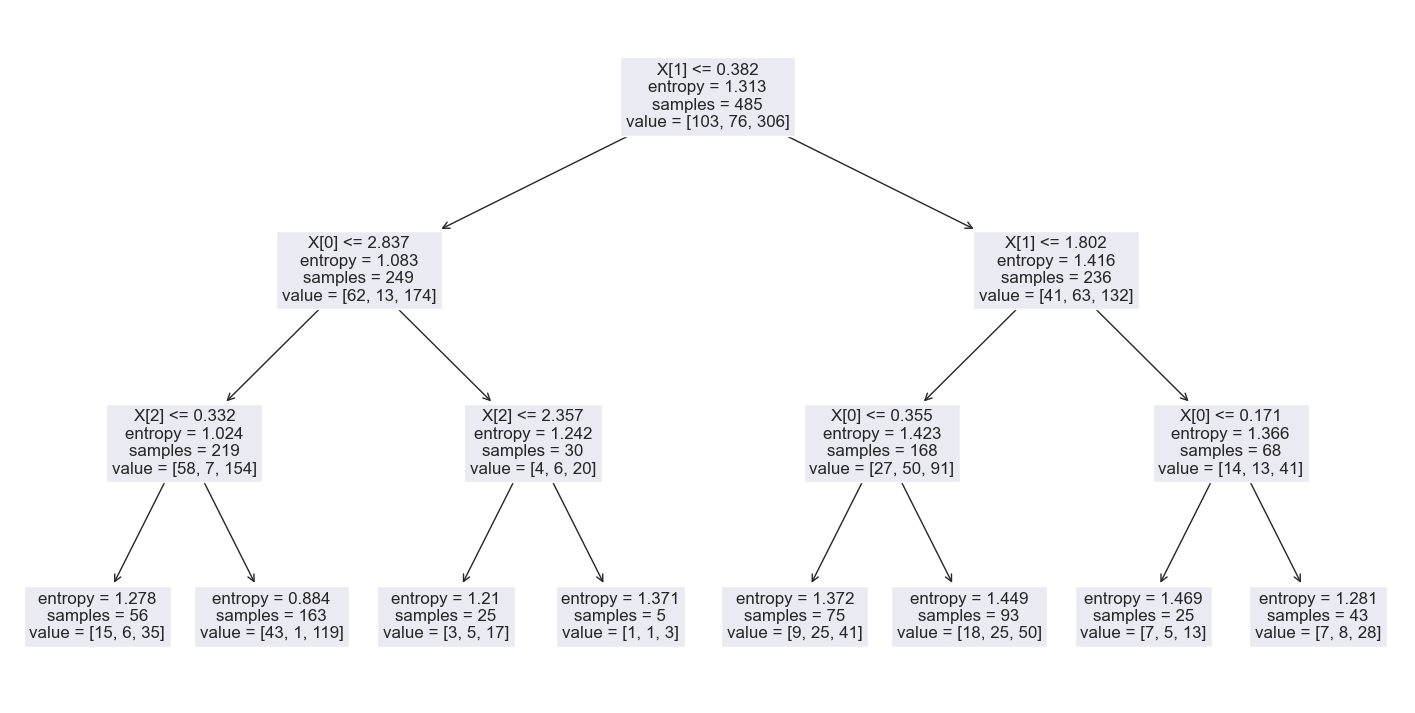

In [49]:
import sklearn.tree as tree
plt.figure(figsize= (18, 9))
tree.plot_tree(remote_tree)
plt.show()

## LEARNING MACHINE CLASSIFICATION TREE TEST 2

In [50]:
x4= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y4= k_dummies.remote_ratio_converted
X4_train, X4_test, y4_train, y4_test = train_test_split( x4, y4, test_size=0.2, random_state=4)
print ('Train set:', X4_train.shape,  y4_train.shape)
print ('Test set:', X4_test.shape,  y4_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [51]:
remote_tree2= DecisionTreeClassifier(criterion= "entropy", max_depth = 3, splitter='best')
remote_tree2.fit(X4_train, y4_train)
remote_tree_pre2= remote_tree2.predict(X4_test)
print("Test set Accuracy: ", metrics.accuracy_score(y4_test, remote_tree_pre2))
from sklearn.metrics import f1_score
f1_score(y4_test, remote_tree_pre2, average='micro')

Test set Accuracy:  0.6639344262295082


0.6639344262295082

Confusion matrix, without normalization
[[ 4  3 17]
 [ 0  7 16]
 [ 1  4 70]]


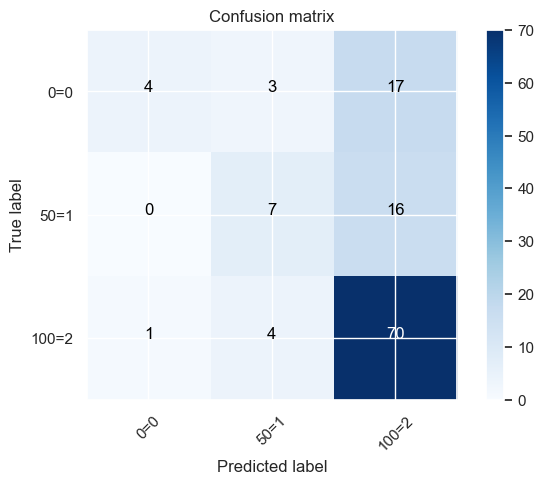

In [52]:
cnf_matrix = confusion_matrix(y4_test, remote_tree_pre2, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

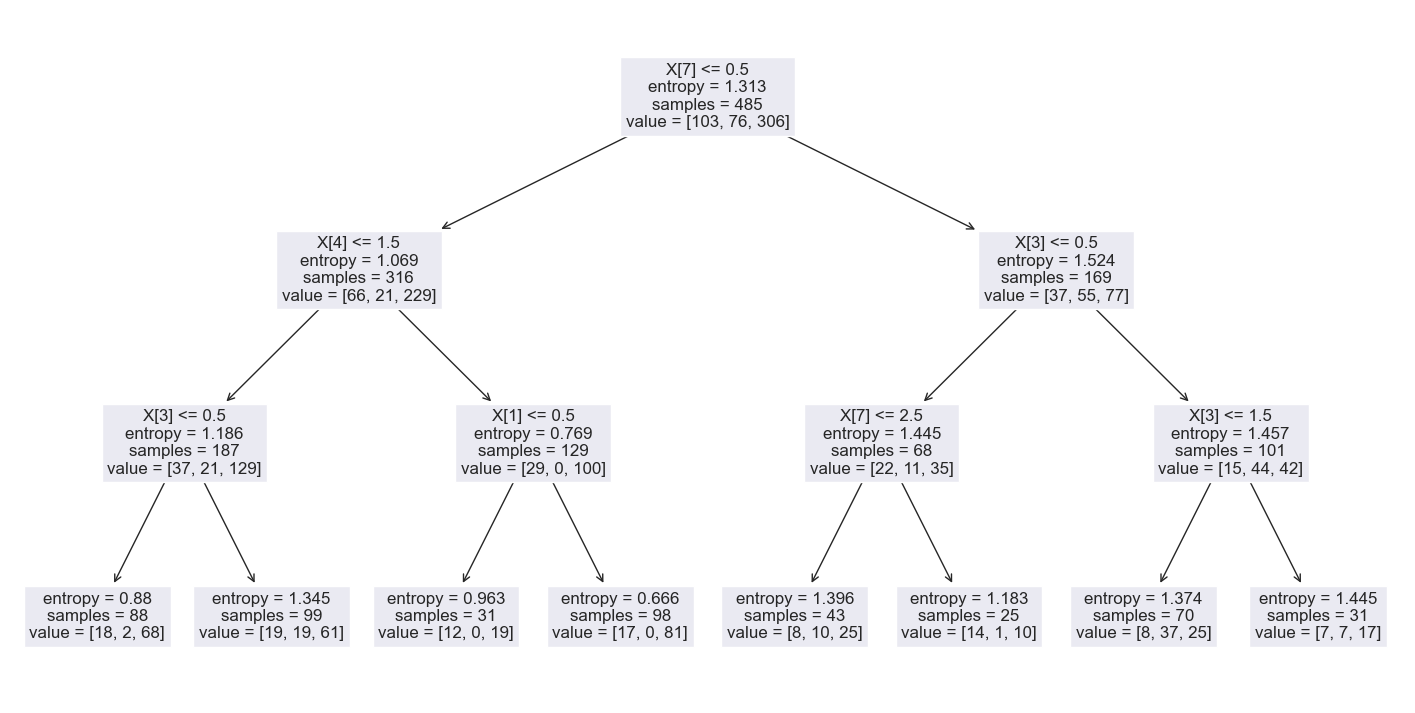

In [53]:
plt.figure(figsize= (18, 9))
tree.plot_tree(remote_tree2)
plt.show()

## LEARNING MACHINE SUPPORT VECTOR MACHINE TEST 1  

In [54]:
from sklearn.svm import SVC
x5= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y5= k_dummies.remote_ratio_converted
X5_train, X5_test, y5_train, y5_test = train_test_split( x5, y5, test_size=0.2, random_state=4)
print ('Train set:', X5_train.shape,  y5_train.shape)
print ('Test set:', X5_test.shape,  y5_test.shape)

Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


In [55]:
SVM= SVC()
SVM.fit(X5_train,y5_train)
SVM_pred=SVM.predict(X5_test)
print("Test set Accuracy: ", metrics.accuracy_score(y5_test, SVM_pred))
f1_score(y5_test, SVM_pred, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


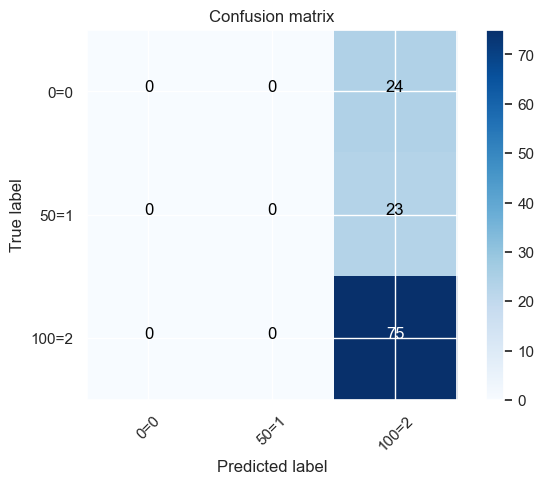

In [56]:
cnf_matrix = confusion_matrix(y5_test, SVM_pred, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

## LEARNING MACHINE SUPPORT VECTOR MACHINE TEST 2

In [57]:
x6= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y6= k_dummies.remote_ratio_converted
X6_train, X6_test, y6_train, y6_test = train_test_split( x6, y6, test_size=0.2, random_state=4)
print ('Train set:', X6_train.shape,  y6_train.shape)
print ('Test set:', X6_test.shape,  y6_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [58]:
SVM2= SVC(C= 1,kernel='sigmoid')
SVM2.fit(X5_train,y5_train)
SVM_pred2=SVM.predict(X5_test)
print("Test set Accuracy: ", metrics.accuracy_score(y6_test, SVM_pred2))
f1_score(y6_test, SVM_pred2, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


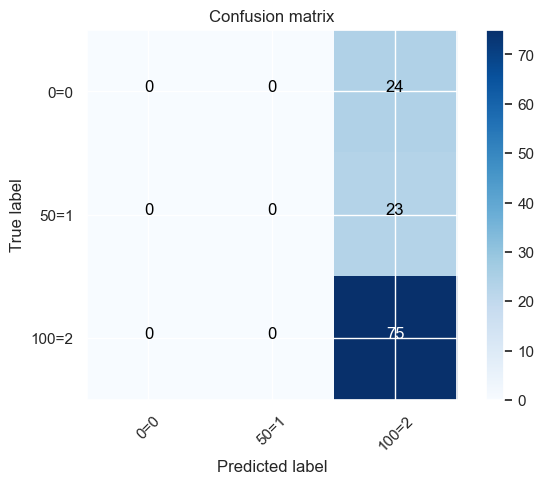

In [59]:
cnf_matrix = confusion_matrix(y6_test, SVM_pred2, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING K.NEAREST NEIGHBORS FOR SALARIES 

In [60]:
k_dummies.columns

Index(['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'remote_ratio_converted', 'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted'],
      dtype='object')

In [69]:
X_salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_salaries= k_dummies.salaries_converted
LRS= KNeighborsClassifier()
X7_train, X7_test, y7_train, y7_test = train_test_split(X_salaries, Y_salaries, test_size=0.2, random_state=4)
LRS.fit(X7_train, y7_train)


KNeighborsClassifier()

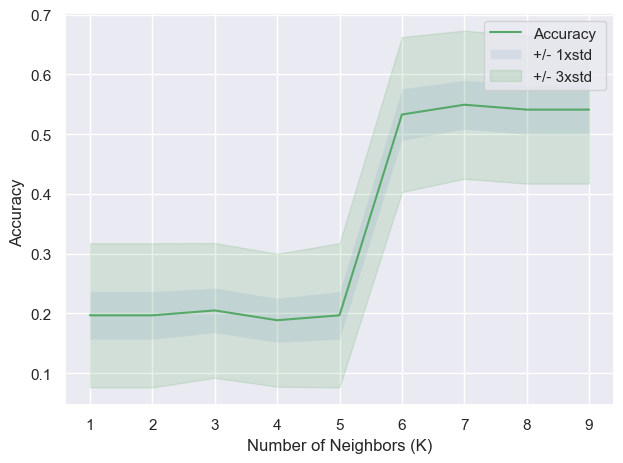

In [70]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    K = KNeighborsClassifier(n_neighbors = n).fit(X7_train,y7_train)
    yhat=K.predict(X7_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y7_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [77]:
k = 7
#Train Model and Predict  
LRS = KNeighborsClassifier(n_neighbors = k).fit(X7_train,y7_train)
LRS
LRS_pre= LRS.predict(X7_test)
print("Test set Accuracy: ", metrics.accuracy_score(y7_test, LRS_pre))

f1_score(y7_test, LRS_pre, average='micro')

Test set Accuracy:  0.7049180327868853


0.7049180327868853

In [72]:
k_dummies.salaries_converted.value_counts()

2    303
0    153
1    151
Name: salaries_converted, dtype: int64

Confusion matrix, without normalization
[[25  5  1]
 [ 9  6 13]
 [ 4  4 55]]


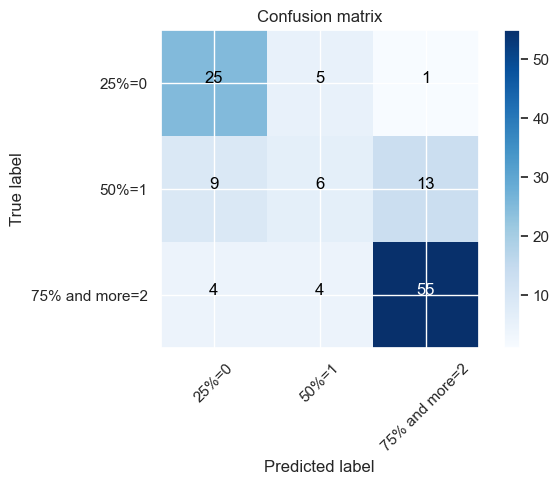

In [73]:
cnf_matrix = confusion_matrix(y7_test, LRS_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING DECISSION TREE FOR SALARIES

In [84]:
X_8salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_8salaries= k_dummies.salaries_converted
X8_train, X8_test, y8_train, y8_test = train_test_split(X_8salaries, Y_8salaries, test_size=0.2, random_state=4)


In [99]:
salaries_tree= DecisionTreeClassifier(criterion='entropy')
salaries_tree.fit(X8_train, y8_train)
salaries_tre_pre= salaries_tree.predict(X8_test)

In [100]:
print("Test set Accuracy: ", metrics.accuracy_score(y8_test, salaries_tre_pre))

f1_score(y8_test, salaries_tre_pre, average='micro')

Test set Accuracy:  0.7049180327868853


0.7049180327868853

Confusion matrix, without normalization
[[25  5  1]
 [ 9  6 13]
 [ 4  4 55]]


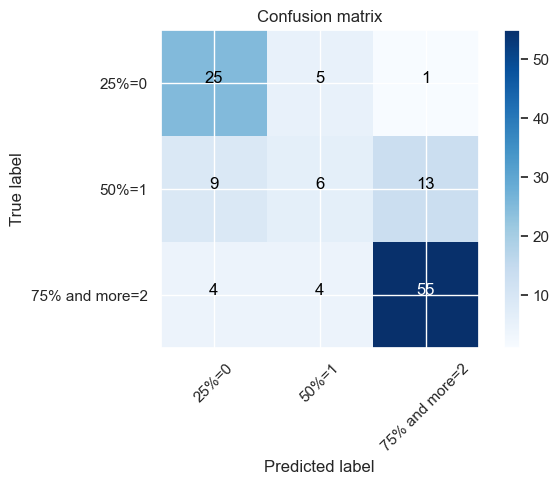

In [101]:
cnf_matrix = confusion_matrix(y8_test, salaries_tre_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

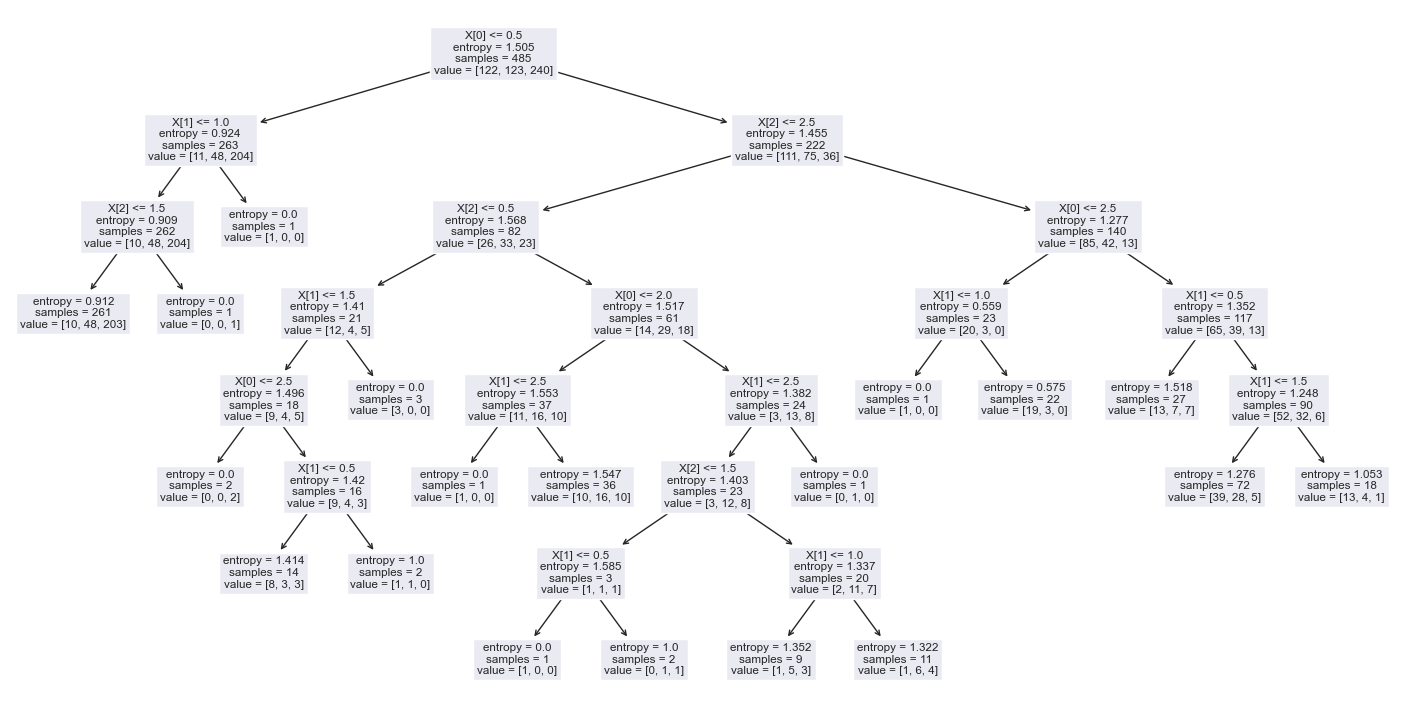

In [102]:
plt.figure(figsize= (18, 9))
tree.plot_tree(salaries_tree)
plt.show()

## MACHINE LEARNING SVM FOR SALARIES

In [117]:
X_9salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_9salaries= k_dummies.salaries_converted
X9_train, X9_test, y9_train, y9_test = train_test_split(X_9salaries, Y_9salaries, test_size=0.2, random_state=4)
Salaries_SVM= SVC(C= 0.5)
Salaries_SVM.fit(X9_train,y9_train)
Salaries_SVM_pre=Salaries_SVM.predict(X9_test)
print("Test set Accuracy: ", metrics.accuracy_score(y9_test, Salaries_SVM_pre))

f1_score(y9_test, Salaries_SVM_pre, average='micro')

Test set Accuracy:  0.7213114754098361


0.7213114754098362

Confusion matrix, without normalization
[[27  3  1]
 [ 9  6 13]
 [ 4  4 55]]


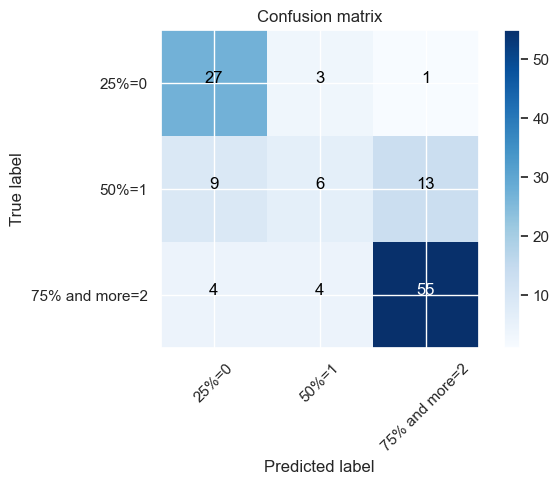

In [118]:
cnf_matrix = confusion_matrix(y9_test, Salaries_SVM_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING LINEAR REGRESSION FOR SALARIES

In [119]:
X_10salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_10salaries= df.salary_in_usd
X10_train, X10_test, y10_train, y10_test = train_test_split(X_10salaries, Y_10salaries, test_size=0.2, random_state=4)

In [120]:
summary_regression_model(X_10salaries, Y_10salaries)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     99.88
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.71e-52
Time:                        19:56:31   Log-Likelihood:                -7518.5
No. Observations:                 607   AIC:                         1.504e+04
Df Residuals:                     603   BIC:                         1.506e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [128]:
SLR= LinearRegression()
SLR.fit(X10_train, y10_train)
SLR_pre= SLR.predict(X10_test)

In [131]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(SLR_pre - y10_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((SLR_pre - y10_test) ** 2))
print("R2-score: %.2f" % r2_score(SLR_pre, y10_test))


Mean absolute error: 40392.06
Residual sum of squares (MSE): 3002087111.21
R2-score: -0.72
